Netflix Data Analysis

You have been provided a dataset of Netflix which consists of TV shows and movies available on 
Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. 
In 2018, they released an interesting report which shows that the number of TV shows on Netflix has 
nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 
2,000 titles since 2010, while its number of TV shows has nearly tripled.

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('netflix_titles_nov_2019.csv')

In [4]:
df.sample(5)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
2352,80227995,Minecraft: Story Mode,NaN,"Patton Oswalt, Catherine Taber, Sean Astin, Me...","United States, Sweden","November 27, 2018",2015,TV-Y7-FV,1 Season,Kids' TV,Take control of an adventure set in the Minecr...,TV Show
4813,80173605,The Next Skin,"Isaki Lacuesta, Isa Campo","Àlex Monner, Emma Suárez, Sergi López, Bruno T...","Spain, Switzerland","May 1, 2017",2016,TV-MA,104 min,"Dramas, International Movies","When a withdrawn, long-missing teenager reappe...",Movie
2635,80215922,Chappaquiddick,John Curran,"Jason Clarke, Kate Mara, Ed Helms, Bruce Dern,...","United States, Sweden","October 1, 2018",2017,PG-13,106 min,Dramas,Senator Ted Kennedy watches his future unravel...,Movie
4678,80121872,Jhansi Ki Rani,NaN,"Ulka Gupta, Sameer Dharmadhikari, Amit Pachori...",India,"June 1, 2017",2009,TV-14,1 Season,"International TV Shows, TV Dramas","In British-ruled, 19th-century India, a 14-yea...",TV Show
309,81110394,Little Miss Sumo,Matt Kay,Hiyori Kon,United Kingdom,"October 28, 2019",2018,TV-G,20 min,"Documentaries, International Movies, Sports Mo...",In an ancient sport traditionally reserved for...,Movie


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB


In [8]:
df.shape

(5837, 12)

In [10]:
df.columns

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type'],
      dtype='object')

In [16]:
# using describe() method to check some statistical information about the data.
df.describe()

,show_id,release_year
count,5.837000e+03,5837.000000
mean,7.730079e+07,2013.688539
std,9.479777e+06,8.419088
min,2.698800e+05,1925.000000
25%,8.004520e+07,2013.000000
50%,8.016353e+07,2016.000000
75%,8.024188e+07,2018.000000
max,8.122720e+07,2020.000000


In [17]:
df.nunique()

show_id         5837
title           5780
director        3108
cast            5087
country          527
date_added      1092
release_year      71
rating            14
duration         194
listed_in        449
description     5829
type               2
dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
# checking total number of null values column wise.
df.isnull().sum()

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64

In [23]:
# total number of null values in entire dataset.
df.isnull().sum().sum()

3536

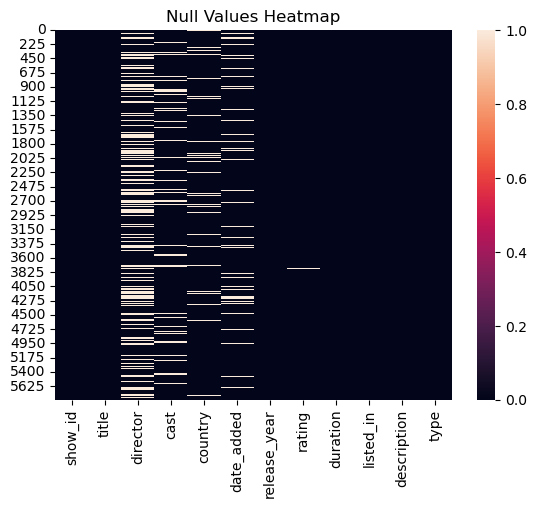

In [24]:
## this is the visual representation of null values present in data
sns.heatmap(df.isnull())
plt.title('Null Values Heatmap')
plt.show()

In [25]:
# creating a copy of dataset so that will not affect our original dataset.
df1 = df.copy()

In [26]:
# dealing will null values
df1['director'].fillna('No Director', inplace=True)
df1['cast'].fillna('No Cast', inplace=True)
df1['country'].fillna('Country Unavailable', inplace=True)
df1.dropna(subset=['date_added','rating'],inplace=True)


In [28]:
df1.isnull().sum()

show_id         0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
type            0
dtype: int64

There are multiple ways to deal with null values but in this we simply replaced all the null values with NA. as the two columns 'date_added' and 'rating' are not going to be part of our analysis so will drop the columns. and from above we can see that there are no more null values in the dataset.

In [29]:
# Let's check total how many Tv shows and movies are present in the dataset.
df1['type'].value_counts()

Movie      3931
TV Show    1255
Name: type, dtype: int64

In [30]:
df1.columns

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type'],
      dtype='object')

In [31]:
df1.sample(4)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
1924,81059643,Hunters of the South Seas,No Director,Will Millard,United Kingdom,"February 1, 2019",2015,TV-14,1 Season,"British TV Shows, Docuseries","In a far corner of the Pacific Ocean, people w...",TV Show
4335,80182482,Krish Trish and Baltiboy: Comics of India,Tilak Shetty,"Damandeep Singh Baggan, Smita Malhotra, Baba S...",Country Unavailable,"September 8, 2017",2012,TV-Y7,61 min,Children & Family Movies,"In three comic-strip-style tales, a boy tries ...",Movie
5260,80126212,Happy And,No Director,"Hee-Jin Lee, Hae-seong Kwon, Paul Stafford, Mi...",Country Unavailable,"December 15, 2016",2012,TV-14,1 Season,"International TV Shows, Korean TV Shows, TV Dr...",This relatable relationship drama explores the...,TV Show
2486,70123126,Paan Singh Tomar,Tigmanshu Dhulia,"Irrfan Khan, Mahie Gill, Rajendra Gupta, Brije...",India,"November 1, 2018",2010,TV-MA,129 min,"Action & Adventure, Dramas, International Movies",Paan Singh Tomar goes from celebrated runner t...,Movie


# Task 1: Plot a graph showing number of contents on Netflix based on Rating.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

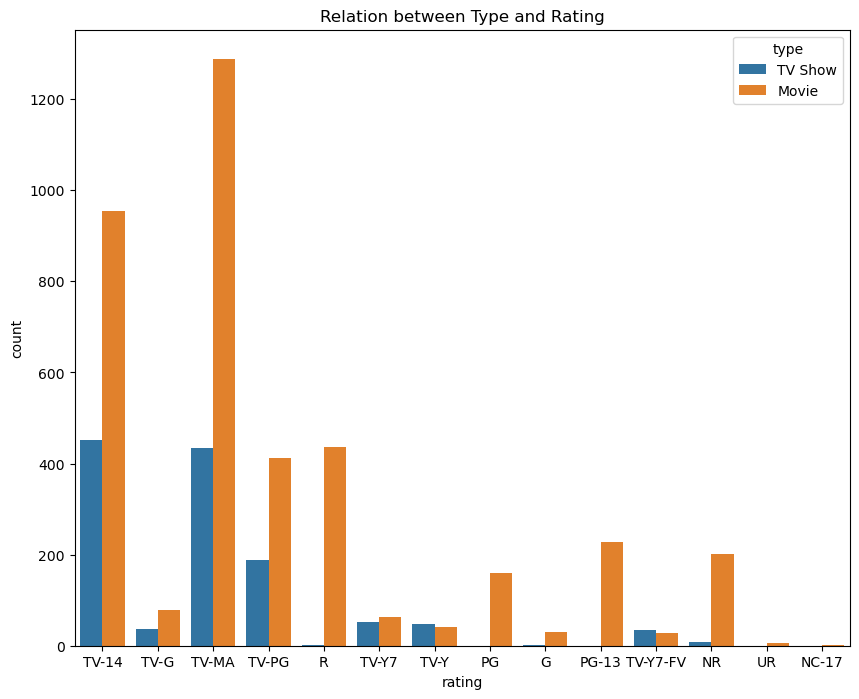

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df1)
plt.title('Relation between Type and Rating')
plt.show()

# Task 2: Plot a graph showing the number of TV Shows and Movies across different type of Rating.

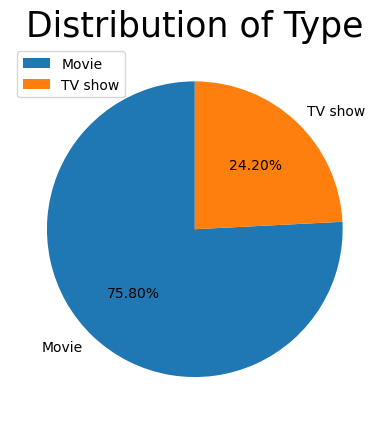

In [42]:
labels = ['Movie', 'TV show']
size = df1['type'].value_counts()
plt.pie(size,labels=labels, startangle = 90, autopct= '%.2f%%')
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

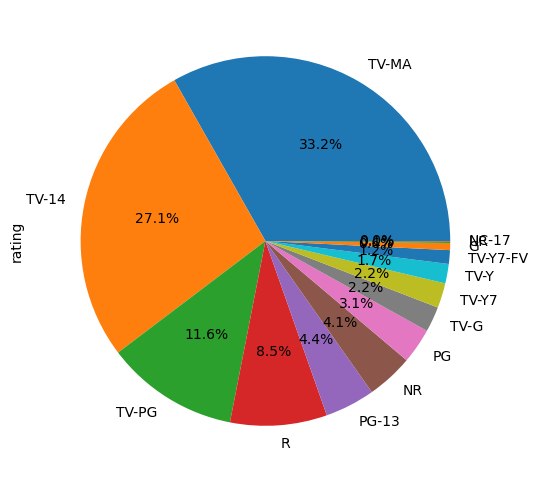

In [44]:
df1['rating'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,6))
plt.show()

In [55]:
df1.rating

0       TV-14
1        TV-G
2       TV-14
3       TV-14
5       TV-14
        ...  
5832       NR
5833    TV-14
5834       NR
5835    TV-MA
5836       NR
Name: rating, Length: 5186, dtype: object

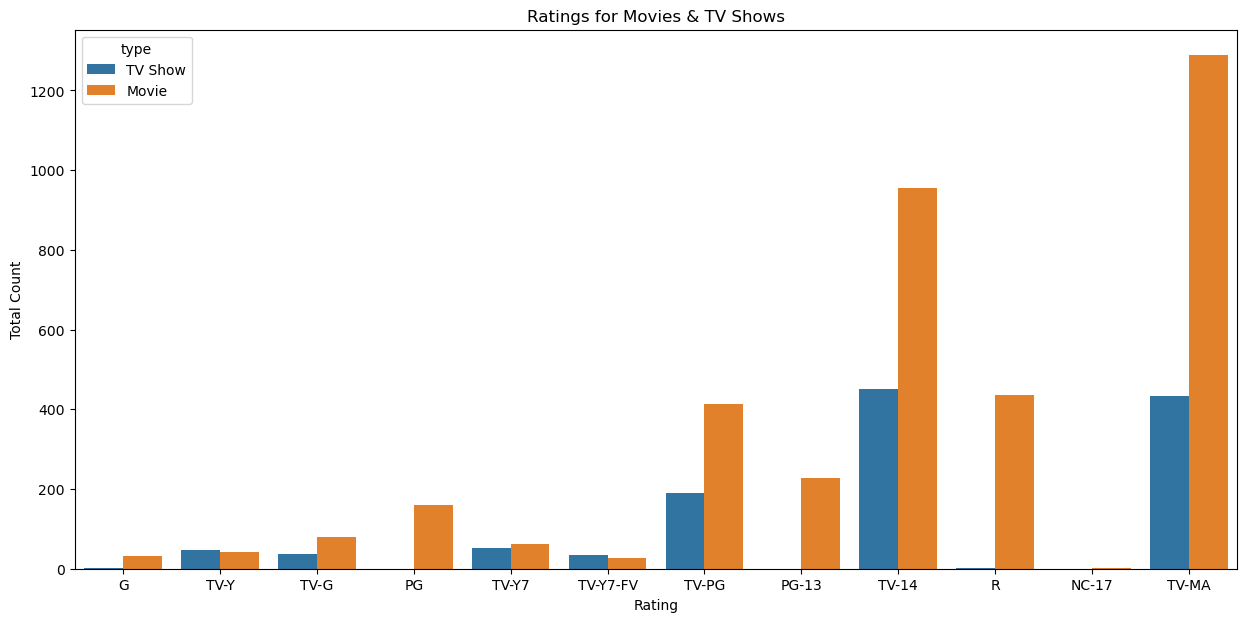

In [60]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

# plot the countplot
plt.figure(figsize=(15,7))
g = sns.countplot(x="rating", hue="type", data=df1, order=order)
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

# Task 3: Compare India, US, Japan, Spain, UK & Canada to check which country produces highest TV Show and Movies.

In [63]:
df1.sample(2)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
603,81132438,Locked on You,Kıvanç Baruönü,"Ata Demirer, Demet Akbağ, Gonca Vuslateri, İlk...",Turkey,"September 13, 2019",2018,TV-14,105 min,"Comedies, International Movies","When his chatty nature lands him in trouble, a...",Movie
4904,80121873,Maharakshak: Aryan,No Director,"Aakarshan Singh, Vikramjeet Virk, Reena Aggarw...",India,"April 1, 2017",2014,TV-14,1 Season,"International TV Shows, TV Action & Adventure,...",Shy nerd Aryan learns soon after his 18th birt...,TV Show


In [71]:
country_names = df1['country'].unique()
country_names

array(['South Korea', 'Country Unavailable', 'India',
       'France, Senegal, Belgium', 'Nigeria', 'France', 'South Africa',
       'United States', 'Japan', 'Brazil',
       'Germany, Canada, United States', 'Canada, Norway', 'Mexico',
       'China', 'United States, United Arab Emirates',
       'United States, Japan', 'Singapore, United States',
       'United Kingdom, Germany, Canada, United States',
       'Australia, France', 'Germany', 'Germany, United Kingdom',
       'Italy, United States',
       'United States, New Zealand, United Kingdom',
       'United Kingdom, Germany, United States', 'United States, Germany',
       'Argentina', 'Taiwan', 'Finland, Germany, Belgium',
       'United Kingdom, France', 'United States, Spain, Chile, Peru',
       'Colombia', 'Spain', 'United States, Ireland',
       'India, United States', 'Thailand',
       'Argentina, United States, Mexico', 'United Kingdom',
       'United States, United Kingdom, Canada', 'China, Hong Kong',
       'Can

In [73]:
filtered_countries = df1[df1["country"].isin(["India", "United States", "Japan", "Spain", "United Kingdom", "Canada"])]


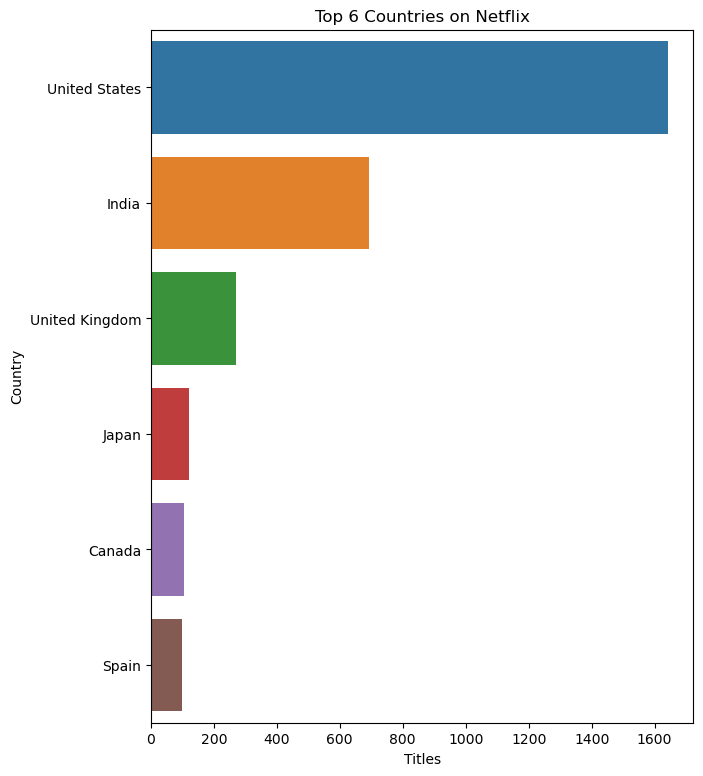

In [78]:
plt.figure(figsize=(7,9))
g = sns.countplot(y=filtered_countries['country'], order=filtered_countries['country'].value_counts().index[:15])
plt.title('Top 6 Countries on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

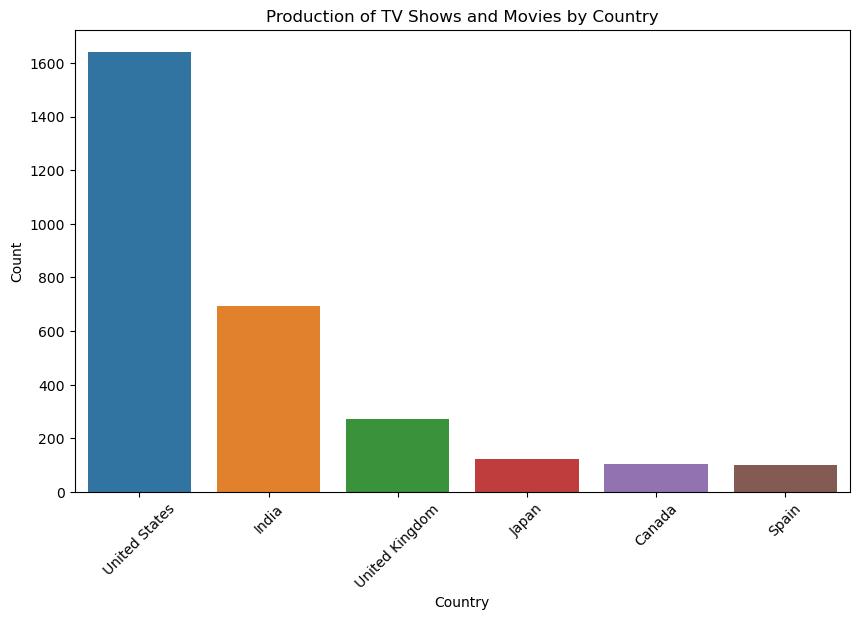

In [79]:
plt.figure(figsize=(10, 6))
countries = ['India', 'United States', 'Japan', 'Spain', 'United Kingdom', 'Canada']
counts = df1[df1['country'].isin(countries)]['country'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.title('Production of TV Shows and Movies by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Task 4: Plot a graph showing the number of TV Shows and Movies added to Netflix every year.

In [86]:
df1['Date'] = df1['release_year']

In [95]:
df1['Date'].value_counts()

2018    890
2017    826
2016    746
2019    590
2015    458
       ... 
1969      1
1956      1
2020      1
1947      1
1954      1
Name: Date, Length: 70, dtype: int64

<AxesSubplot: >

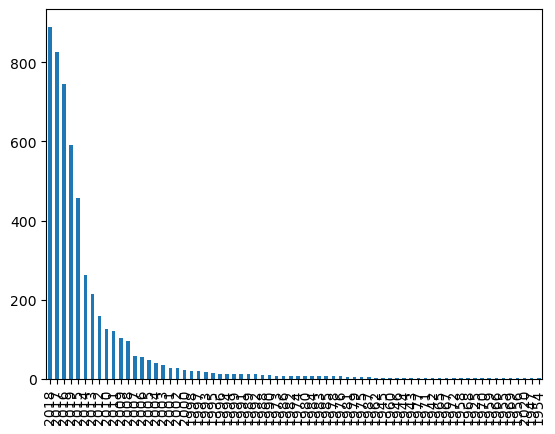

In [101]:
df1['Date'].value_counts().plot(kind = 'bar')

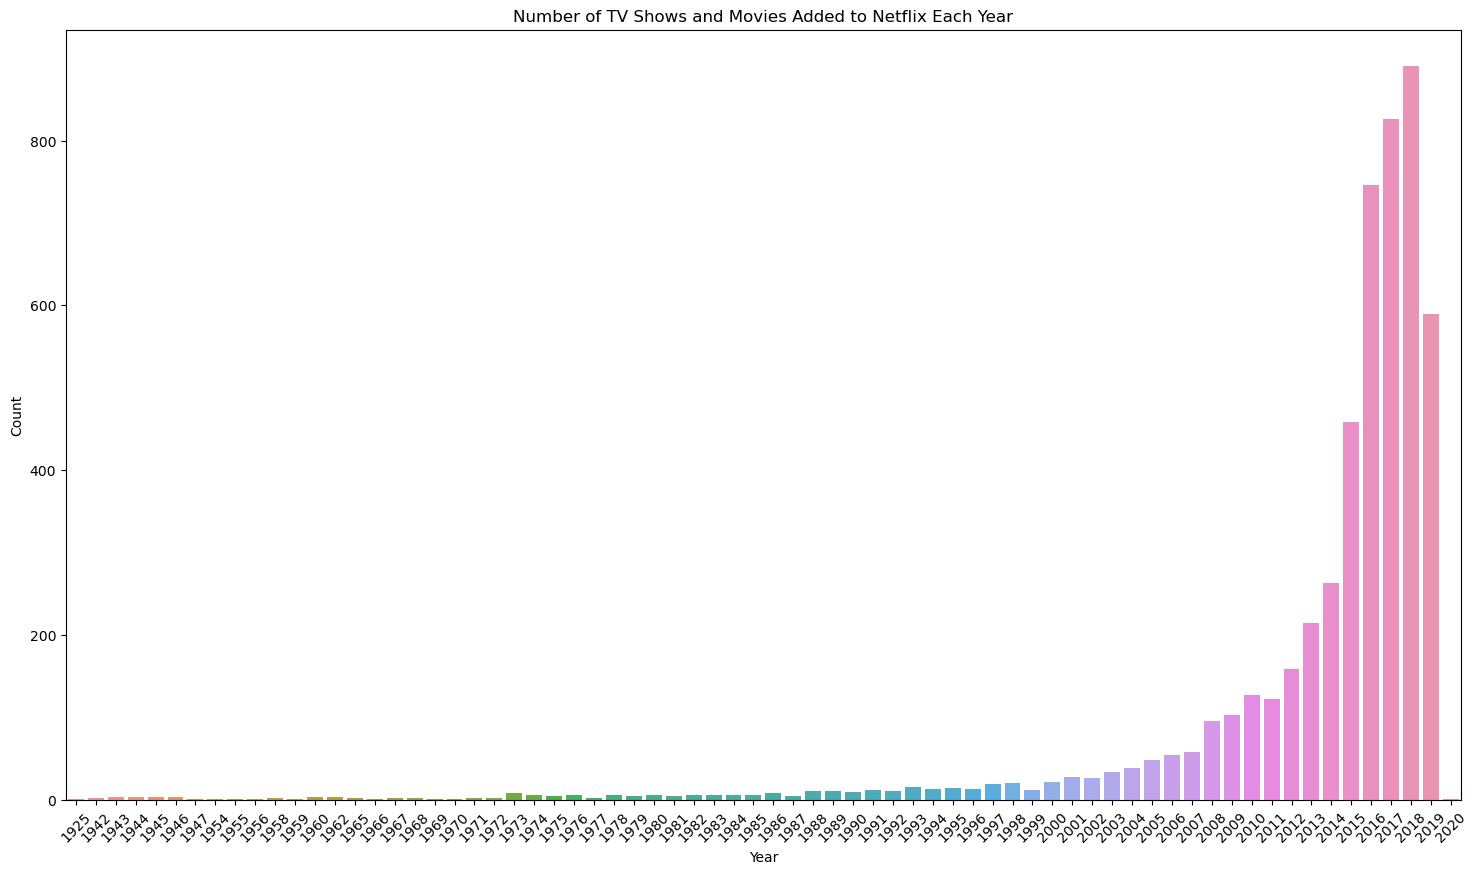

In [98]:
plt.figure(figsize=(18, 10))
year_counts = df1['release_year'].value_counts().sort_index()
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title('Number of TV Shows and Movies Added to Netflix Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

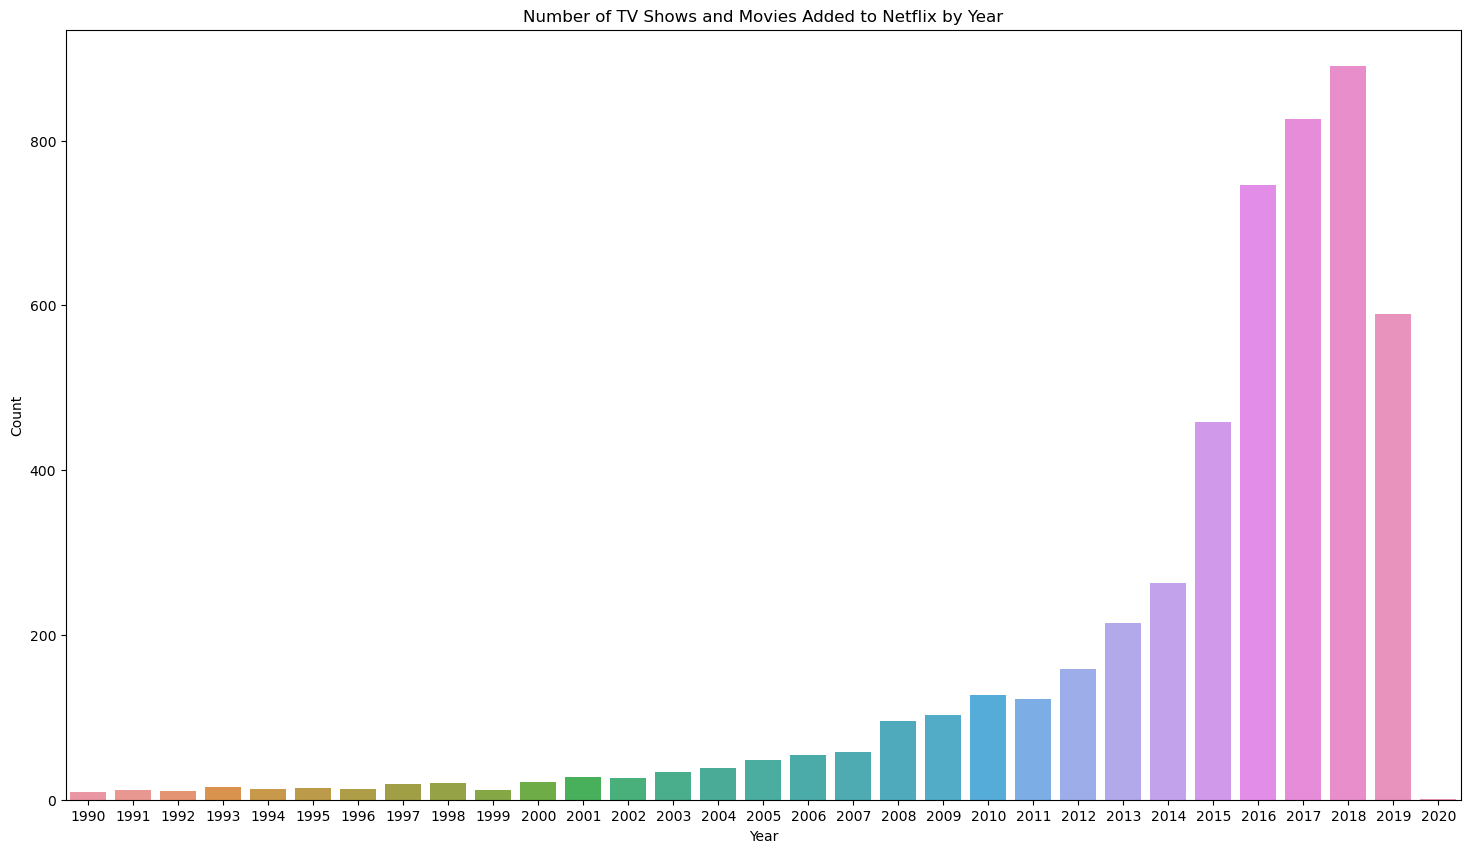

In [100]:
plt.figure(figsize=(18, 10))
filtered_years = df1[df1['release_year'] >= 1990]
year_counts = filtered_years['release_year'].value_counts().sort_index()
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title('Number of TV Shows and Movies Added to Netflix by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Task 5: In 2019, Find out if Netflix has added more TV Shows or Movies to their platform and represent the same visually.

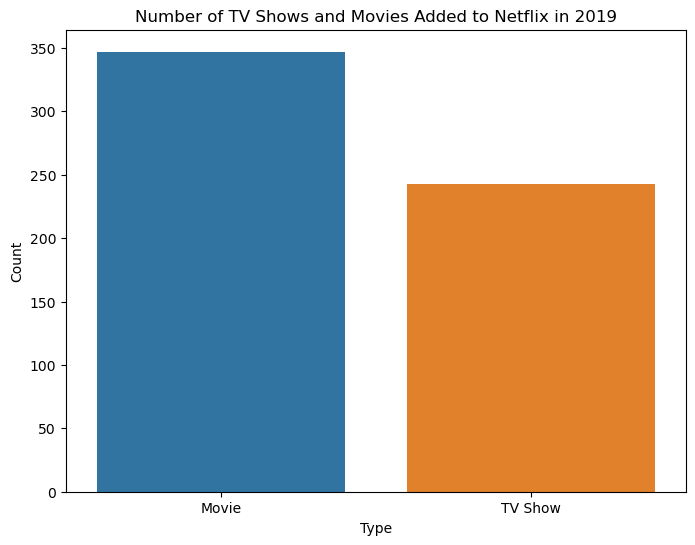

In [102]:
df_2019 = df1[df1['release_year'] == 2019]
counts_2019 = df_2019['type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=counts_2019.index, y=counts_2019.values)
plt.title('Number of TV Shows and Movies Added to Netflix in 2019')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()